In [3]:
from process import *
from calculate import *
from plots import *
from envelopes import *
from supports import *

import numpy as np
import matplotlib.pyplot as plt

src = os.getcwd() + "/data/"

In [30]:
small = 10
medium = 12
big = 14

plt.rc('font', size=small)          # controls default text sizes
plt.rc('axes', titlesize=big)     # fontsize of the axes title
plt.rc('axes', labelsize=medium)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=small)    # fontsize of the tick labels
plt.rc('ytick', labelsize=small)    # fontsize of the tick labels
plt.rc('legend', fontsize=medium)    # legend fontsize
plt.rc('figure', titlesize=big)     # fontsize of the figure title

# TLS, single-tone

$$\frac{\epsilon_d}{2\cdot 2\pi}=0.1$$ 

In [31]:
Tslr = src + "data_191107_194613_red_Nq2_Nt1_Om0.2_wd1.273_wq6.5_wc4.0_wsb0.0007"
Tslb = src + "data_191107_201955_blue_Nq2_Nt1_Om0.2_wd5.278_wq6.5_wc4.0_wsb0.003"
Tssr = src + "data_191108_083540_red_Nq2_Nt1_Om0.2_wd1.257_wq4.0_wc6.5_wsb0.0005"
Tssb = src + "data_191107_202828_blue_Nq2_Nt1_Om0.2_wd5.231_wq4.0_wc6.5_wsb0.0019"

quants = ['times', 'expect', 'e0', 'g1', 'e1', 'g0']

Tslr_times, _, Tslr_expect, Tslr_e0, Tslr_g1, _      , _      , _ = load_data(quants, Tslr)
Tslb_times, _, Tslb_expect, _      , _      , Tslb_e1, Tslb_g0, _ = load_data(quants, Tslb)
Tssr_times, _, Tssr_expect, Tssr_e0, Tssr_g1, _      , _      , _ = load_data(quants, Tssr)
Tssb_times, _, Tssb_expect, _      , _      , Tssb_e1, Tssb_g0, _ = load_data(quants, Tssb)

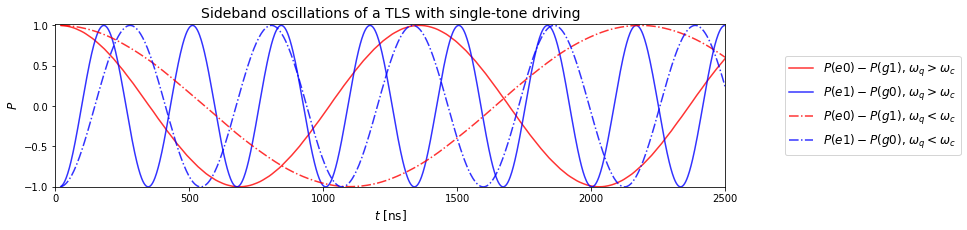

In [32]:
fig, ax1 = plt.subplots(figsize=[15,3])

Tslr_plot = ax1.plot(Tslr_times, Tslr_e0-Tslr_g1, '-',  c='r', alpha=0.8, label="$P(e0)-P(g1)$, $\\omega_q > \\omega_c$")
Tslb_plot = ax1.plot(Tslb_times, Tslb_e1-Tslb_g0, '-',  c='b', alpha=0.8, label="$P(e1)-P(g0)$, $\\omega_q > \\omega_c$")
Tssr_plot = ax1.plot(Tssr_times, Tssr_e0-Tssr_g1, '-.', c='r', alpha=0.8, label="$P(e0)-P(g1)$, $\\omega_q < \\omega_c$")
Tssb_plot = ax1.plot(Tssb_times, Tssb_e1-Tssb_g0, '-.', c='b', alpha=0.8, label="$P(e1)-P(g0)$, $\\omega_q < \\omega_c$")
ax1.set_xlim([0, 2500])
ax1.set_ylim([-1, 1.02])

ax1.set_xlabel("$t$ [ns]")
ax1.set_ylabel("$P$")
ax1.set_title("Sideband oscillations of a TLS with single-tone driving")
plots = Tslr_plot + Tslb_plot + Tssr_plot + Tssb_plot
labels = [plot.get_label() for plot in plots]
box = ax1.get_position()
ax1.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax1.legend(plots, labels, loc='center left', bbox_to_anchor=(1.08, 0.5))
plt.show()

# TLS, double-tone

$$\frac{\epsilon_q}{2\cdot 2\pi}=0.025$$

$$\frac{\epsilon_q}{2\cdot 2\pi}=0.317$$ 

In [33]:
Tdlr = src + "data_191107_155905_red_Nq2_Nt2_Omq0.05_wdq6.125_Omc0.63_wdc3.5_dw0.5_wq6.5_wc4.0_wsb0.0061"
Tdlb = src + "data_191107_160042_blue_Nq2_Nt2_Omq0.05_wdq7.12_Omc0.63_wdc3.5_dw0.5_wq6.5_wc4.0_wsb0.0049"
Tdsr = src + "data_191107_170843_red_Nq2_Nt2_Omq0.05_wdq3.401_Omc0.63_wdc6.0_dw0.5_wq4.0_wc6.5_wsb0.0038"
Tdsb = src + "data_191107_174517_blue_Nq2_Nt2_Omq0.05_wdq4.396_Omc0.63_wdc6.0_dw0.5_wq4.0_wc6.5_wsb0.0045"

quants = ['times', 'expect', 'e0', 'g1', 'e1', 'g0']

Td_times, _, Tdlr_expect, Tdlr_e0, Tdlr_g1, _      , _      , _ = load_data(quants, Tdlr)
_,        _, Tdlb_expect, _      , _      , Tdlb_e1, Tdlb_g0, _ = load_data(quants, Tdlb)
_,        _, Tdsr_expect, Tdsr_e0, Tdsr_g1, _      , _      , _ = load_data(quants, Tdsr)
_,        _, Tdsb_expect, _      , _      , Tdsb_e1, Tdsb_g0, _ = load_data(quants, Tdsb)

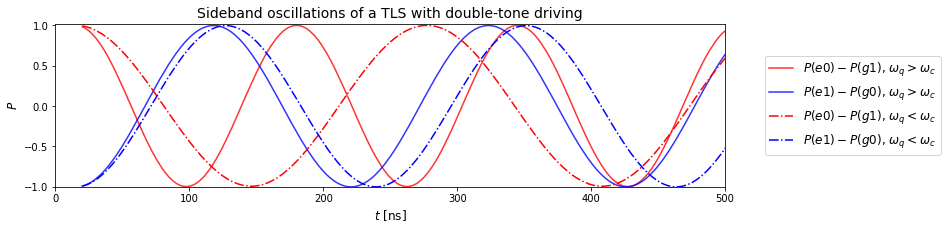

In [35]:
fig, ax1 = plt.subplots(figsize=[15,3])

Tdlr_plot = ax1.plot(Td_times, Tdlr_e0-Tdlr_g1, '-', c='r', alpha=0.8, label="$P(e0)-P(g1)$, $\\omega_q > \\omega_c$")
Tdlb_plot = ax1.plot(Td_times, Tdlb_e1-Tdlb_g0, '-', c='b', alpha=0.8, label="$P(e1)-P(g0)$, $\\omega_q > \\omega_c$")
Tdsr_plot = ax1.plot(Td_times, Tdsr_e0-Tdsr_g1, '-.', c='r', alpha=1.0, label="$P(e0)-P(g1)$, $\\omega_q < \\omega_c$")
Tdsb_plot = ax1.plot(Td_times, Tdsb_e1-Tdsb_g0, '-.', c='b', alpha=1.0, label="$P(e1)-P(g0)$, $\\omega_q < \\omega_c$")
ax1.set_xlim([0, 500])
ax1.set_ylim([-1, 1.02])

ax1.set_xlabel("$t$ [ns]")
ax1.set_ylabel("$P$")
ax1.set_title("Sideband oscillations of a TLS with double-tone driving")
plots = Tdlr_plot + Tdlb_plot + Tdsr_plot + Tdsb_plot
labels = [plot.get_label() for plot in plots]
box = ax1.get_position()
ax1.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax1.legend(plots, labels, loc='center left', bbox_to_anchor=(1.05, 0.5))
plt.show()

# Transmon, single-tone

$$\frac{\epsilon_d}{2\cdot 2\pi}=0.3$$

In [36]:
tslr = src + "data_191109_122801_red_Nq10_Nt1_Om0.6_wd1.257_wq6.5_wc4.0_wsb0.0005"
tslb = src + "data_191108_084954_blue_Nq10_Nt1_Om0.6_wd5.216_wq6.5_wc4.0_wsb0.0037"
tssr = src + "data_191108_120317_red_Nq10_Nt1_Om0.6_wd1.288_wq4.0_wc6.5_wsb0.0011"
tssb = src + "data_191108_085415_blue_Nq10_Nt1_Om0.6_wd5.223_wq4.0_wc6.5_wsb0.0013"

quants = ['times', 'expect', 'e0', 'g1', 'e1', 'g0']

ts_times, _, tslr_expect, tslr_e0, tslr_g1, _      , _      , _ = load_data(quants, tslr)
_,        _, tslb_expect, _      , _      , tslb_e1, tslb_g0, _ = load_data(quants, tslb)
_,        _, tssr_expect, tssr_e0, tssr_g1, _      , _      , _ = load_data(quants, tssr)
_,        _, tssb_expect, _      , _      , tssb_e1, tssb_g0, _ = load_data(quants, tssb)

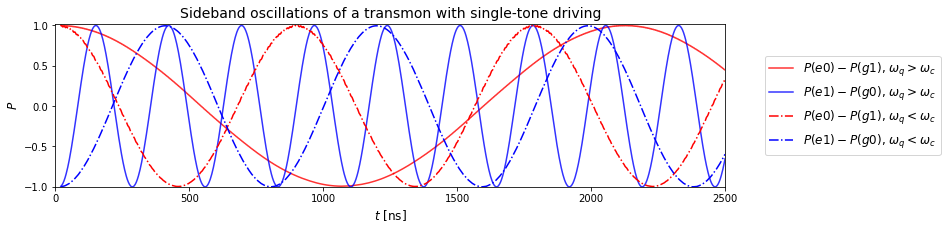

In [37]:
fig, ax1 = plt.subplots(figsize=[15,3])

tslr_plot = ax1.plot(ts_times, tslr_e0-tslr_g1, '-', c='r', alpha=0.8, label="$P(e0)-P(g1)$, $\\omega_q > \\omega_c$")
tslb_plot = ax1.plot(ts_times, tslb_e1-tslb_g0, '-', c='b', alpha=0.8, label="$P(e1)-P(g0)$, $\\omega_q > \\omega_c$")
tssr_plot = ax1.plot(ts_times, tssr_e0-tssr_g1, '-.', c='r', alpha=1.0, label="$P(e0)-P(g1)$, $\\omega_q < \\omega_c$")
tssb_plot = ax1.plot(ts_times, tssb_e1-tssb_g0, '-.', c='b', alpha=1.0, label="$P(e1)-P(g0)$, $\\omega_q < \\omega_c$")
ax1.set_xlim([0, 2500])
ax1.set_ylim([-1, 1.02])

ax1.set_xlabel("$t$ [ns]")
ax1.set_ylabel("$P$")
ax1.set_title("Sideband oscillations of a transmon with single-tone driving")
plots = tslr_plot + tslb_plot + tssr_plot + tssb_plot
labels = [plot.get_label() for plot in plots]
box = ax1.get_position()
ax1.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax1.legend(plots, labels, loc='center left', bbox_to_anchor=(1.05, 0.5))
plt.show()

# Transmon, double-tone

$$\frac{\epsilon_q}{2\cdot 2\pi}=0.0375$$

$$\frac{\epsilon_q}{2\cdot 2\pi}=0.4755$$ 

In [38]:
tdlr = src + "data_191109_122825_red_Nq10_Nt2_Omq0.08_wdq5.988_Omc0.95_wdc3.5_dw0.5_wq6.5_wc4.0_wsb0.0019"
tdlb = src + "data_191108_123933_blue_Nq10_Nt2_Omq0.08_wdq6.946_Omc0.95_wdc3.5_dw0.5_wq6.5_wc4.0_wsb0.0018"
tdsr = src + "data_191108_144206_red_Nq10_Nt2_Omq0.08_wdq3.418_Omc0.95_wdc6.0_dw0.5_wq4.0_wc6.5_wsb0.0009"
tdsb = src + "data_191109_122900_blue_Nq10_Nt2_Omq0.08_wdq4.447_Omc0.95_wdc6.0_dw0.5_wq4.0_wc6.5_wsb0.0008"

quants = ['times', 'expect', 'e0', 'g1', 'e1', 'g0']

td_times, _, tdlr_expect, tdlr_e0, tdlr_g1, _      , _      , _ = load_data(quants, tdlr)
_,        _, tdlb_expect, _      , _      , tdlb_e1, tdlb_g0, _ = load_data(quants, tdlb)
_,        _, tdsr_expect, tdsr_e0, tdsr_g1, _      , _      , _ = load_data(quants, tdsr)
_,        _, tdsb_expect, _      , _      , tdsb_e1, tdsb_g0, _ = load_data(quants, tdsb)

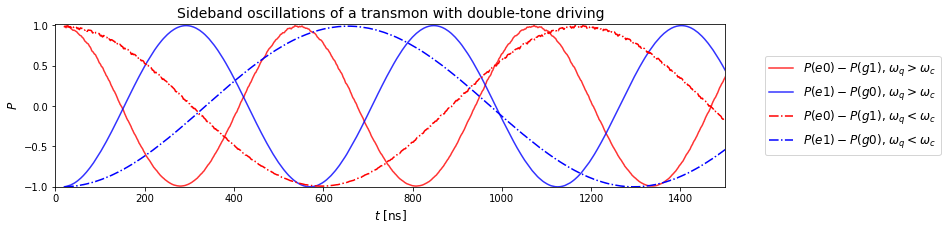

In [39]:
fig, ax1 = plt.subplots(figsize=[15,3])

tdlr_plot = ax1.plot(td_times, tdlr_e0-tdlr_g1, '-', c='r', alpha=0.8, label="$P(e0)-P(g1)$, $\\omega_q > \\omega_c$")
tdlb_plot = ax1.plot(td_times, tdlb_e1-tdlb_g0, '-', c='b', alpha=0.8, label="$P(e1)-P(g0)$, $\\omega_q > \\omega_c$")
tdsr_plot = ax1.plot(td_times, tdsr_e0-tdsr_g1, '-.', c='r', alpha=1.0, label="$P(e0)-P(g1)$, $\\omega_q < \\omega_c$")
tdsb_plot = ax1.plot(td_times, tdsb_e1-tdsb_g0, '-.', c='b', alpha=1.0, label="$P(e1)-P(g0)$, $\\omega_q < \\omega_c$")
ax1.set_xlim([0, 1500])
ax1.set_ylim([-1, 1.02])

ax1.set_xlabel("$t$ [ns]")
ax1.set_ylabel("$P$")
ax1.set_title("Sideband oscillations of a transmon with double-tone driving")
plots = tdlr_plot + tdlb_plot + tdsr_plot + tdsb_plot
labels = [plot.get_label() for plot in plots]
box = ax1.get_position()
ax1.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax1.legend(plots, labels, loc='center left', bbox_to_anchor=(1.05, 0.5))
plt.show()